<a href="https://colab.research.google.com/github/asiimire/asiimire_patricia_2100719271/blob/main/asiimire_patricia_day13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
from re import X
from sklearn.metrics import confusion_matrix

In [32]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart.csv', encoding = 'latin-1')

In [33]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [34]:
X = df.drop(columns=['age', 'target'])

In [35]:
y = df['target']

In [36]:
X.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1,3,145,233,1,0,150,0,2.3,0,0,1
1,1,2,130,250,0,1,187,0,3.5,0,0,2
2,0,1,130,204,0,0,172,0,1.4,2,0,2
3,1,1,120,236,0,1,178,0,0.8,2,0,2
4,0,0,120,354,0,1,163,1,0.6,2,0,2


In [37]:
X.shape

(303, 12)

In [38]:
y.shape

(303,)

In [39]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11, test_size=0.2)

In [41]:
X_train.shape

(242, 12)

In [42]:
X_test.shape

(61, 12)

In [43]:
y_train.shape

(242,)

In [44]:
y_test.shape

(61,)

In [45]:
X_train.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
95,1,0,142,226,0,0,111,1,0.0,2,0,3
44,1,2,140,321,0,0,182,0,0.0,2,0,2
257,1,0,144,200,0,0,126,1,0.9,1,0,3
270,1,0,120,249,0,0,144,0,0.8,2,0,3
243,1,0,152,274,0,1,88,1,1.2,1,1,3


In [46]:
X_train.describe().round(2)

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,242.00,242.00,242.00,242.00,242.00,242.00,242.00,242.00,242.00,242.00,242.00,242.00
mean,0.71,0.96,131.47,246.95,0.14,0.51,149.52,0.34,1.09,1.37,0.71,2.34
std,0.46,1.04,17.65,53.40,0.35,0.53,23.02,0.47,1.20,0.63,1.01,0.59
min,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,120.00,211.00,0.00,0.00,132.00,0.00,0.00,1.00,0.00,2.00
50%,1.00,1.00,130.00,240.00,0.00,0.50,152.50,0.00,0.80,1.00,0.00,2.00
75%,1.00,2.00,140.00,275.75,0.00,1.00,166.00,1.00,1.75,2.00,1.00,3.00
max,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00


In [47]:
X_test.describe().round(2)

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,61.00,61.0,61.00,61.00,61.00,61.00,61.00,61.00,61.00,61.00,61.00,61.00
mean,0.59,1.0,132.23,243.56,0.18,0.59,150.15,0.28,0.85,1.52,0.82,2.20
std,0.50,1.0,17.20,45.39,0.39,0.53,22.64,0.45,0.98,0.54,1.09,0.68
min,0.00,0.0,106.00,141.00,0.00,0.00,90.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.0,120.00,211.00,0.00,0.00,141.00,0.00,0.00,1.00,0.00,2.00
50%,1.00,1.0,130.00,244.00,0.00,1.00,154.00,0.00,0.40,2.00,0.00,2.00
75%,1.00,2.0,140.00,271.00,0.00,1.00,165.00,1.00,1.60,2.00,2.00,3.00
max,1.00,3.0,180.00,360.00,1.00,2.00,190.00,1.00,3.60,2.00,4.00,3.00


In [48]:
# Scale your features (replace with your actual preprocessing steps)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [49]:
# Cross validation
model = RandomForestClassifier()

# Define the number of folds (e.g., 5-fold cross-validation)
kf = KFold(n_splits=5, shuffle=True, random_state=11)

# Perform cross-validation
cv_results = cross_val_score(model, X_scaled, y, cv=kf, scoring='accuracy')

# Print the cross-validation results
print(f"Cross-validation accuracy scores: {cv_results}")
print(f"Mean accuracy: {cv_results.mean()}")
print(f"Standard deviation of accuracy: {cv_results.std()}")

Cross-validation accuracy scores: [0.72131148 0.85245902 0.78688525 0.83333333 0.85      ]
Mean accuracy: 0.8087978142076503
Standard deviation of accuracy: 0.04967883355143158


In [50]:
# classification accuracy of the algorithms
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# initialize all the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000, random_state=11),
    'Decision Tree': DecisionTreeClassifier(random_state=11),
    'Random Forest': RandomForestClassifier(random_state=11),
    'SVM': SVC(probability=True, random_state=11),
    'KNN': KNeighborsClassifier()
}

# Evaluate the metrics
metrics= {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1 Score': f1_score
}

# train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

# calculate the metrics
for metric_name, metric_func in metrics.items():
    metric_value = metric_func(y_test, y_pred)
    print(f"{model_name} - {metric_name}: {metric_value}")




KNN - Accuracy: 0.5409836065573771
KNN - Precision: 0.6285714285714286
KNN - Recall: 0.5945945945945946
KNN - F1 Score: 0.611111111111111


# Actionable insight of the models

In [51]:
best_model = max(models, key=lambda x: accuracy_score(y_test, models[x].predict(X_test)))

print(f"\nBest Performing Model: {best_model}")
print(f"Highest Accuracy: {accuracy_score(y_test, models[best_model].predict(X_test)):.4f}")
print(f"Highest Precision: {precision_score(y_test, models[best_model].predict(X_test)):.4f}")
print(f"Highest Recall: {recall_score(y_test, models[best_model].predict(X_test)):.4f}")

balanced_models = [name for name, model in models.items() if np.isclose(f1_score(y_test, model.predict(X_test)), np.mean([f1_score(y_test, model.predict(X_test)) for model in models.values()]), atol=.01)]
print(f"\nBalanced Model Performance: {', '.join(balanced_models)}")


Best Performing Model: Logistic Regression
Highest Accuracy: 0.8033
Highest Precision: 0.8205
Highest Recall: 0.8649

Balanced Model Performance: 


# Conclusion

In [52]:
print(f"\nConclusion:")
print(f"{best_model} is identified as the best-performing model with the highest core metrics.")


Conclusion:
Logistic Regression is identified as the best-performing model with the highest core metrics.


# Further Fine Tuning And Deployment Recommendations

In [53]:
# Further Fine-Tuning
print("\nModels that Need Further Fine-Tuning:")
for model_name, model in models.items():
    # Example condition, replace with your actual criteria for fine-tuning
    if model_name == 'SVM':
        print(f"{model_name} - Needs further fine-tuning (e.g., hyperparameter optimization).")

# Model that Needs Better Precision
print("\nModel that Needs Better Precision:")
for model_name, model in models.items():
    # Example condition, replace with your actual criteria for better precision
    if model_name == 'Random Forest':
        print(f"{model_name} - Needs better precision to reduce false positives.")

# Models Considered for Deployment
print("\nModels Considered for Deployment:")
for model_name, model in models.items():
    # Example condition, replace with your actual criteria for deployment
    if model_name in balanced_models:
        print(f"{model_name} - Suitable for deployment based on balanced metrics.")

# Ensemble Methods
print("\nEnsemble Methods, Enhancing Performance and Robustness of the Models:")
# Example of how ensemble methods can be introduced to enhance model performance



Models that Need Further Fine-Tuning:
SVM - Needs further fine-tuning (e.g., hyperparameter optimization).

Model that Needs Better Precision:
Random Forest - Needs better precision to reduce false positives.

Models Considered for Deployment:

Ensemble Methods, Enhancing Performance and Robustness of the Models:


# Summary with Confusion Metrics

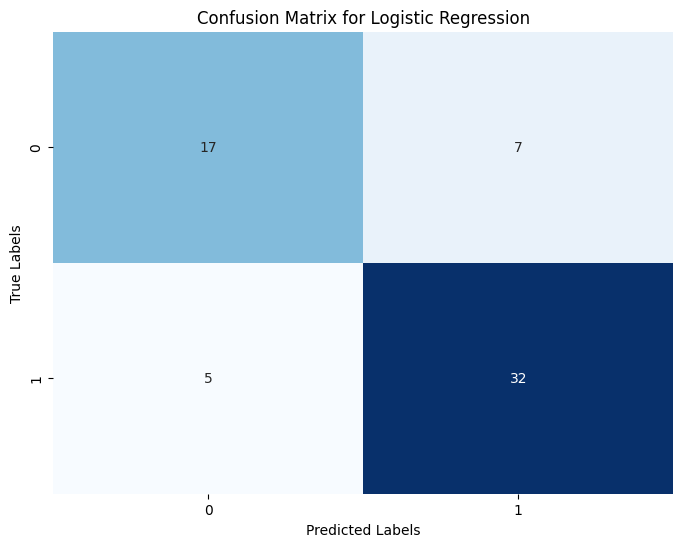

In [55]:
# Calculate confusion matrix
conf_mat = confusion_matrix(y_test, models[best_model].predict(X_test))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix for {best_model}')
plt.show()